# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from collections import Counter 
# Import API key
from api_keys import weather_api_key
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'api_keys'

## Runs ** HOLD **

## Generate Cities List

In [125]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

## Runs ** HOLD **  edit print list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [126]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "&appid=" + weather_api_key
city_key = "&q=" 
units = "&units=imperial"

query_url = (f'{url}&appid={weather_api_key}{units}&q=')

city_list = []
country_list = []
lat_list = []
lon_list = []
temp_list = []
temp_max_list = []
clouds_list = []
humidity_list = []
wind_speed_list = []
date_time_list = []
counter = 0


for city in cities:
    response = requests.get(query_url + city).json()
    counter = counter + 1
    try:
        city_list.append(response['name'])
        country_list.append(response['sys']['country'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        temp_list.append(response['main']['temp'])
        temp_max_list.append(response['main']['temp_max'])
        clouds_list.append(response['clouds']['all'])
        humidity_list.append(response['main']['humidity'])
        wind_speed_list.append(response['wind']['speed'])  
        date_time_list.append(response['dt'])
                                                      
        print(str(counter) + ' - ' +  city + " has been processed!")
        time.sleep(1)
    except:            
        print(city + " data not found")
        
        
    
    

1 - daltenganj has been processed!
2 - balikpapan has been processed!
3 - kumluca has been processed!
belushya guba data not found
5 - hermanus has been processed!
6 - charters towers has been processed!
7 - georgetown has been processed!
8 - fort nelson has been processed!
illoqqortoormiut data not found
10 - iquique has been processed!
skalistyy data not found
12 - vaini has been processed!
13 - talnakh has been processed!
14 - ullapool has been processed!
15 - latung has been processed!
louisbourg data not found
17 - carnarvon has been processed!
18 - hobart has been processed!
19 - thompson has been processed!
20 - khatanga has been processed!
21 - lagoa has been processed!
22 - newport has been processed!
23 - busselton has been processed!
24 - tasiilaq has been processed!
saleaula data not found
26 - jamestown has been processed!
27 - barrow has been processed!
28 - rikitea has been processed!
29 - upernavik has been processed!
pousat data not found
31 - iskateley has been proces

242 - krasnyy yar has been processed!
243 - aras has been processed!
244 - madoc has been processed!
afmadu data not found
246 - acajutla has been processed!
247 - salalah has been processed!
248 - komsomolskiy has been processed!
249 - sorland has been processed!
250 - bambous virieux has been processed!
251 - morondava has been processed!
cockburn harbour data not found
253 - tabou has been processed!
254 - zelenoborsk has been processed!
samusu data not found
256 - kruisfontein has been processed!
257 - moerai has been processed!
258 - guane has been processed!
naral data not found
260 - mumford has been processed!
261 - amalapuram has been processed!
262 - waynesville has been processed!
263 - depalpur has been processed!
264 - poltavka has been processed!
265 - paris has been processed!
266 - puri has been processed!
kazalinsk data not found
268 - kariba has been processed!
269 - gusinoye ozero has been processed!
270 - rosiori has been processed!
271 - alofi has been processed!
m

484 - sulangan has been processed!
485 - fort saint james has been processed!
486 - bereda has been processed!
487 - vavatenina has been processed!
488 - san pedro de macoris has been processed!
489 - dingle has been processed!
490 - gondanglegi has been processed!
491 - skjervoy has been processed!
492 - saint anthony has been processed!
493 - kozhevnikovo has been processed!
494 - hasaki has been processed!
495 - ivolginsk has been processed!
496 - palmer has been processed!
497 - ambilobe has been processed!
498 - gat has been processed!
499 - phalodi has been processed!
500 - sanary-sur-mer has been processed!
501 - lompoc has been processed!
502 - pingliang has been processed!
503 - springbok has been processed!
504 - port antonio has been processed!
505 - riviere-au-renard has been processed!
506 - luena has been processed!
507 - santa maria has been processed!
508 - berasia has been processed!
509 - tura has been processed!
510 - nenjiang has been processed!
511 - najran has bee

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Runs ** HOLD **

In [127]:
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Country":country_list,
    "Latitude": lat_list,
    "Longitude": lon_list,
    "Temperature": temp_list,
    "Max Temperature": temp_max_list,
    "Cloudiness": clouds_list,
    "Humidity": humidity_list,
    "Wind Speed": wind_speed_list,
    "Date/Time": date_time_list
})

city_weather_df

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed,Date/Time
0,Medininagar,IN,24.0333,84.0667,56.64,56.64,0,38,4.41,1611975906
1,Balikpapan,ID,-1.2675,116.8289,84.20,84.20,40,79,3.44,1611976016
2,Kumluca,TR,36.3703,30.2869,47.32,47.32,83,53,3.74,1611976017
3,Hermanus,ZA,-34.4187,19.2345,61.00,61.00,72,91,3.29,1611976019
4,Charters Towers,AU,-20.1000,146.2667,88.97,88.97,76,31,9.89,1611976020
...,...,...,...,...,...,...,...,...,...,...
545,Mayumba,GA,-3.4320,10.6554,76.69,76.69,100,91,4.23,1611976631
546,Kedrovoye,RU,57.1576,60.5698,3.20,3.20,20,92,11.18,1611976654
547,Rushden,GB,52.2914,-0.5992,41.34,42.01,100,89,3.00,1611976655
548,Verkhoyansk,RU,67.5447,133.3850,-41.49,-41.49,95,76,0.04,1611976507


In [128]:
city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=True)

In [129]:
hum_list = city_weather_df["Humidity"]

for humidity in hum_list:
    if humidity > 100:
        print(humidity)


In [130]:
# humm_list = city_weather_df[city_weather_df["Humidity"]>100].index
# humm_list

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [131]:
#  Get the indices of cities that have humidity over 100%.


In [132]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Temperature (F)')

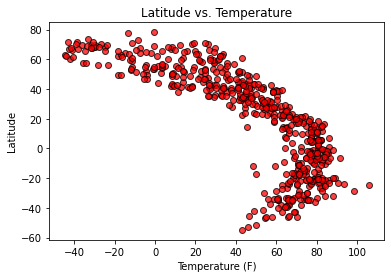

In [133]:
y_axis = lat_list
x_axis = temp_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Temperature')
plt.ylabel('Latitude')
plt.xlabel('Temperature (F)')


## Latitude vs. Humidity Plot

Text(0.5, 0, 'Humidity')

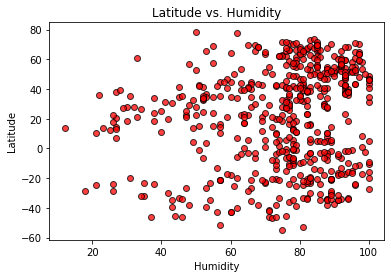

In [134]:
y_axis = lat_list
x_axis = humidity_list


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Humidity')
plt.ylabel('Latitude')
plt.xlabel('Humidity')

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Cloudiness')

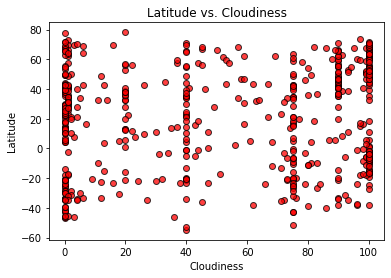

In [135]:
y_axis = lat_list
x_axis = clouds_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Cloudiness')
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Wind Speed (mph)')

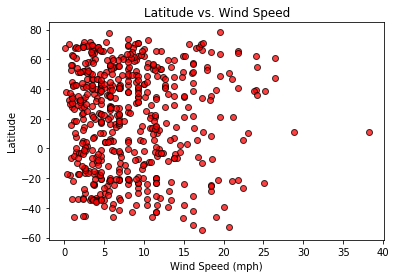

In [136]:
y_axis = lat_list
x_axis = wind_speed_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Wind Speed')
plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

## Linear Regression

In [137]:
#list comprehension to find north and south latitudes
north_lats = [n_lat for n_lat in lat_list if n_lat >= 0]
south_lats = [lat for lat in lat_list if lat < 0]


In [138]:
nnorth_lats = city_weather_df.loc[city_weather_df["Latitude"]>= 0]
nnorth_lats



,City,Country,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed,Date/Time
0,Medininagar,IN,24.0333,84.0667,56.64,56.64,0,38,4.41,1611975906
2,Kumluca,TR,36.3703,30.2869,47.32,47.32,83,53,3.74,1611976017
5,George Town,MY,5.4112,100.3354,82.04,84.20,20,65,8.05,1611976021
6,Fort Nelson,CA,58.8053,-122.7002,-11.20,-11.20,75,77,3.44,1611976022
9,Talnakh,RU,69.4865,88.3972,-31.63,-31.63,3,65,3.00,1611976026
...,...,...,...,...,...,...,...,...,...,...
544,Mehamn,NO,71.0357,27.8492,24.58,24.58,100,96,17.45,1611976651
546,Kedrovoye,RU,57.1576,60.5698,3.20,3.20,20,92,11.18,1611976654
547,Rushden,GB,52.2914,-0.5992,41.34,42.01,100,89,3.00,1611976655
548,Verkhoyansk,RU,67.5447,133.3850,-41.49,-41.49,95,76,0.04,1611976507


In [2]:
north_hem_df = pd.DataFrame({
    "Latitude": north_lats
})

south_hem_df = pd.DataFrame({
    "Latitude": south_lats
})

merged_north_hem_df = pd.merge(north_hem_df, city_weather_df, how="left", on=["Latitude"])
merged_north_hem_df.reset_index

merged_south_hem_df = pd.merge(south_hem_df, city_weather_df, how="left", on=["Latitude"])
merged_south_hem_df.reset_index

    


NameError: name 'north_lats' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

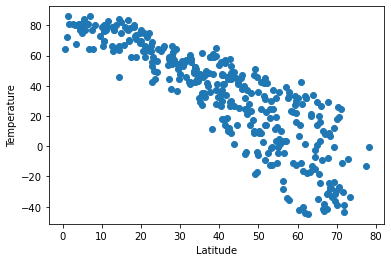

In [140]:
x_values = merged_north_hem_df['Latitude']
y_values = merged_north_hem_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

# print(regress_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept






In [141]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.47x +93.77


The r-value is: 0.7468006703992462


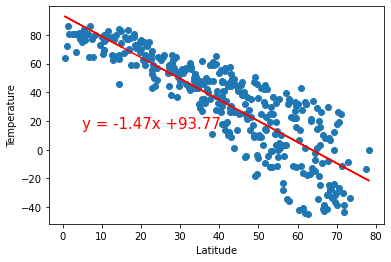

In [142]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression